In [3]:
%load_ext autoreload
%autoreload 2
%pylab inline

import pandas as pd
import numpy as np
from Bio import SeqIO
from os.path import *
import os
import sys
from StringIO import StringIO

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
#https://zulko.wordpress.com/2012/09/29/animate-your-3d-plots-with-pythons-matplotlib/
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
 
##### TO CREATE A SERIES OF PICTURES
 
def make_views(ax, angles, elevations=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    i = 0
    for elevation in elevations:
        for angle in angles:
            ax.view_init(elev=elevation, azim=angle)
            fname = '%s%03d.png'%(prefix,i)
            ax.figure.savefig(fname)
            files.append(fname)
            i += 1
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files,output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    print command[output_ext]
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])
 
 
 
def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)
     
    for f in files:
        os.remove(f)

In [5]:
sys.path.insert(0, '/media/VD_Research/People/tyghe.vallard/Projects/bio_pieces')
from bio_pieces import aln_pca

In [6]:
fasta = '/media/VD_Research/People/tyghe.vallard/Projects/bio_pieces/tests/testinput/aln1.fasta'
assert exists(fasta), "Fasta file does not exist"

In [7]:
fasta_fh = StringIO('''>id1
ATGCA
>id2
ATGCC
>id3
CGTRG
>id4
ATGGA
>id5
ACGCA''')
fasta_fh = open(fasta)

In [8]:
ifasta = aln_pca.index_fasta(fasta_fh)

In [9]:
id_matrix = aln_pca.identity_matrix(ifasta)
id_matrix

,D3GII_KDH0014A_consensus,D3GII_KDH0014A_c002,D3GII_KDH0014A_c004,D3GII_KDH0014A_c008,D3GII_KDH0014A_c011,D3GII_KDH0014A_c025,D3GII_KDH0014A_c033,D3GII_KDH0014A_c034,D3GII_KDH0014A_c035,D3GII_KDH0014A_c036,...,D3GII_KDC0064A_c035,D3GII_KDC0064A_c036,D3GII_KDC0064A_c037,D3GII_KDC0064A_c039,D3GII_KDC0064A_c040,D3GII_KDC0064A_c041,D3GII_KDC0064A_c043,D3GII_KDC0064A_c044,D3GII_KDC0064A_c045,D3GII_KDC0064A_c046
D3GII_KDH0014A_consensus,1479,1479,1478,1476,1477,1477,1476,1478,1474,1479,...,1477,1479,1479,1478,1479,1478,1479,1478,1478,1478
D3GII_KDH0014A_c002,1479,1479,1478,1476,1477,1477,1476,1478,1474,1479,...,1477,1479,1479,1478,1479,1478,1479,1478,1478,1478
D3GII_KDH0014A_c004,1478,1478,1479,1475,1476,1476,1475,1477,1473,1478,...,1476,1478,1478,1477,1478,1477,1478,1477,1477,1477
D3GII_KDH0014A_c008,1476,1476,1475,1479,1478,1474,1475,1475,1471,1476,...,1474,1476,1476,1475,1476,1475,1476,1475,1475,1475
D3GII_KDH0014A_c011,1477,1477,1476,1478,1479,1475,1476,1476,1472,1477,...,1475,1477,1477,1476,1477,1476,1477,1476,1476,1476
D3GII_KDH0014A_c025,1477,1477,1476,1474,1475,1479,1474,1476,1472,1477,...,1475,1477,1477,1476,1477,1476,1477,1476,1476,1476
D3GII_KDH0014A_c033,1476,1476,1475,1475,1476,1474,1479,1475,1471,1476,...,1474,1476,1476,1475,1476,1475,1476,1475,1475,1475
D3GII_KDH0014A_c034,1478,1478,1477,1475,1476,1476,1475,1479,1473,1478,...,1476,1478,1478,1477,1478,1477,1478,1477,1477,1477
D3GII_KDH0014A_c035,1474,1474,1473,1471,1472,1472,1471,1473,1479,1474,...,1472,1474,1474,1473,1474,1473,1474,1473,1473,1473
D3GII_KDH0014A_c036,1479,1479,1478,1476,1477,1477,1476,1478,1474,1479,...,1477,1479,1479,1478,1479,1478,1479,1478,1478,1478


In [10]:
m = id_matrix.as_matrix()
mean_vector = id_matrix.mean().as_matrix()
mean_vector

array([ 1477.35106383,  1477.35106383,  1476.37234043,  1474.62765957,
        1475.60638298,  1475.39361702,  1474.54255319,  1476.37234043,
        1472.4787234 ,  1477.35106383,  1475.39361702,  1472.5       ,
        1477.35106383,  1471.62765957,  1473.67021277,  1473.43617021,
        1473.67021277,  1473.67021277,  1475.41489362,  1476.37234043,
        1475.43617021,  1477.35106383,  1474.54255319,  1476.37234043,
        1477.35106383,  1476.5       ,  1472.67021277,  1475.39361702,
        1476.37234043,  1475.43617021,  1477.35106383,  1473.5212766 ,
        1477.35106383,  1476.37234043,  1477.35106383,  1467.56382979,
        1473.5212766 ,  1473.43617021,  1477.35106383,  1474.54255319,
        1477.35106383,  1476.37234043,  1472.67021277,  1475.39361702,
        1472.67021277,  1477.35106383,  1476.37234043,  1476.37234043,
        1475.39361702,  1476.37234043,  1477.35106383,  1477.35106383,
        1476.37234043,  1476.39361702,  1476.41489362,  1476.43617021,
      

In [11]:
scatter_matrix = np.zeros(m.shape)
for i in range(m.shape[1]):
    scatter_matrix += (m[:,i].reshape(m.shape[0],1) - mean_vector).dot(
        (m[:,i].reshape(m.shape[0],1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

('Scatter Matrix:\n', array([[ 71695.72340425,  71695.72340425,  58166.4893617 , ...,
         59234.78723404,  58166.4893617 ,  58166.4893617 ],
       [ 71695.72340425,  71695.72340425,  58166.4893617 , ...,
         59234.78723404,  58166.4893617 ,  58166.4893617 ],
       [ 58166.4893617 ,  58166.4893617 ,  53473.25531915, ...,
         53601.55319149,  53097.25531915,  53097.25531915],
       ..., 
       [ 59234.78723404,  59234.78723404,  53601.55319149, ...,
         55609.85106383,  53601.55319149,  53601.55319149],
       [ 58166.4893617 ,  58166.4893617 ,  53097.25531915, ...,
         53601.55319149,  53473.25531915,  53097.25531915],
       [ 58166.4893617 ,  58166.4893617 ,  53097.25531915, ...,
         53601.55319149,  53097.25531915,  53473.25531915]]))


In [12]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

print eig_val_sc
print eig_vec_sc

[  4.49271104e+06 +0.00000000e+00j   2.24277078e+06 +0.00000000e+00j
   7.75614972e+04 +0.00000000e+00j   5.44597132e+04 +0.00000000e+00j
   3.19608526e+04 +0.00000000e+00j   2.61493465e+04 +0.00000000e+00j
   1.65939221e+04 +0.00000000e+00j   1.10037991e+04 +0.00000000e+00j
   8.47660890e+03 +0.00000000e+00j   7.12831186e+03 +0.00000000e+00j
   6.57093853e+03 +0.00000000e+00j   5.86303946e+03 +0.00000000e+00j
   5.09299531e+03 +0.00000000e+00j   6.01600000e+03 +0.00000000e+00j
   3.75190221e+03 +0.00000000e+00j   3.36354399e+03 +0.00000000e+00j
   2.20686633e+03 +0.00000000e+00j   1.64769383e+03 +0.00000000e+00j
   1.47020195e+03 +0.00000000e+00j   1.08590191e+03 +0.00000000e+00j
   7.56520726e+02 +0.00000000e+00j   7.14768652e+02 +0.00000000e+00j
   4.55121491e+02 +0.00000000e+00j   1.50400000e+03 +0.00000000e+00j
   1.50400000e+03 +0.00000000e+00j   1.50400000e+03 +0.00000000e+00j
   1.50400000e+03 +0.00000000e+00j   1.50400000e+03 +0.00000000e+00j
   1.50400000e+03 +0.00000000e+00j

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = []
for i in range(len(eig_val_sc)):
    a = np.abs(eig_val_sc[i])
    b = eig_vec_sc[:,i]
    eig_pairs.append((a,b))
    
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0])
eig_pairs.reverse()

In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(m.shape[0],1),
                      eig_pairs[1][1].reshape(m.shape[0],1),
                      eig_pairs[2][1].reshape(m.shape[0],1)))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[  1.09213757e-01+0.j,  -8.96537646e-02+0.j,   1.12669316e-02+0.j],
       [  1.09213757e-01+0.j,  -8.96537646e-02+0.j,   1.12669316e-02+0.j],
       [  1.06794508e-01+0.j,  -2.85670703e-02+0.j,   2.50820548e-03+0.j],
       [  9.47696583e-02+0.j,   8.08644253e-02+0.j,  -1.11325229e-01+0.j],
       [  9.79035755e-02+0.j,   1.97145167e-02+0.j,  -9.50117803e-02+0.j],
       [  1.03584030e-01+0.j,   3.24092176e-02+0.j,  -6.90976441e-03+0.j],
       [  9.71361887e-02+0.j,   8.57313733e-02+0.j,  -5.46902051e-02+0.j],
       [  1.06794508e-01+0.j,  -2.85670703e-02+0.j,   2.50820548e-03+0.j],
       [  8.95347656e-02+0.j,   2.13944721e-01+0.j,  -4.28296595e-02+0.j],
       [  1.09213757e-01+0.j,  -8.96537646e-02+0.j,   1.12669316e-02+0.j],
       [  1.03584030e-01+0.j,   3.24092176e-02+0.j,  -6.90976441e-03+0.j],
       [  8.99085823e-02+0.j,   2.12586955e-01+0.j,  -4.28773824e-02+0.j],
       [  1.09213757e-01+0.j,  -8.96537646e-02+0.j,   1.12669316e-02+0.j],
       [ 

In [15]:
transformed = matrix_w.T.dot(m)
transformed

array([[ 14265.14394669+0.j,  14265.14394669+0.j,  14255.70262431+0.j,
         14238.62391106+0.j,  14248.08928313+0.j,  14246.24846003+0.j,
         14237.90611024+0.j,  14255.70262431+0.j,  14217.97579053+0.j,
         14265.14394669+0.j,  14246.24846003+0.j,  14218.19193237+0.j,
         14265.14394669+0.j,  14209.57307756+0.j,  14229.24429708+0.j,
         14227.28253909+0.j,  14229.24429708+0.j,  14229.24429708+0.j,
         14246.40526589+0.j,  14255.70262431+0.j,  14246.66187378+0.j,
         14265.14394669+0.j,  14237.90611024+0.j,  14255.70262431+0.j,
         14265.14394669+0.j,  14256.82738826+0.j,  14219.18630486+0.j,
         14246.24846003+0.j,  14255.70262431+0.j,  14246.66187378+0.j,
         14265.14394669+0.j,  14227.98785815+0.j,  14265.14394669+0.j,
         14255.70262431+0.j,  14265.14394669+0.j,  14169.57444180+0.j,
         14227.98785815+0.j,  14227.28253909+0.j,  14265.14394669+0.j,
         14237.90611024+0.j,  14265.14394669+0.j,  14255.70262431+0.j,
      

In [16]:
mean_x = transformed[0,:].mean()
mean_y = transformed[1,:].mean()
mean_z = transformed[2,:].mean()
print(mean_x)
print(mean_y)
print(mean_z)

(14249.8372533+0j)
(1231.65975061+0j)
(152.57539008+0j)


/media/VD_Research/Admin/PBS/Software/Python-2.7.9/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


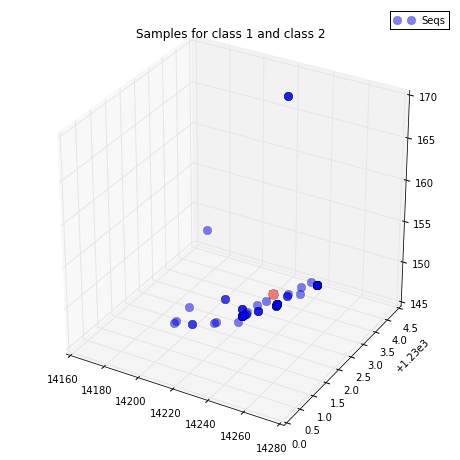

In [17]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(transformed[0,:], transformed[1,:], transformed[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='Seqs')
ax.plot([mean_x], [mean_y], [mean_z],
       'o', markersize=10, color='red', alpha=0.5)

'''
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]+mean_x],
                [mean_y, v[1]+mean_y],
                [mean_z, v[2]+mean_z],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")

    ax.add_artist(a)
    
for i,xyz in enumerate(zip(transformed[0,:], transformed[1,:], transformed[2,:])):
    x,y,z = xyz
    label = id_matrix.keys()[i]
    x2d, y2d, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
    ax.annotate(label, xy=(x2d,y2d), textcoords='offset points')
'''
plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

In [18]:
angles = np.linspace(0,360,21)[:-1] # A list of 20 angles between 0 and 360
angles = np.array([0,45,90])
elevs = np.array([0,45,90])
 
# create an animated gif (20ms between frames)
rotanimate(ax, angles, 'movie.png', elevations=elevs, delay=100, width=10, heigh=10)

('PC axes in terms of the measurement axes scaled by the standard deviations:\n', array([[ -1.08995305e-01,  -1.08995305e-01,  -1.08214224e-01, ...,
         -1.06291058e-01,  -1.08214224e-01,  -1.08214224e-01],
       [ -3.41356706e-03,  -3.41356706e-03,  -3.57543413e-03, ...,
         -3.60022516e-03,  -3.57543413e-03,  -3.57543413e-03],
       [ -1.53892514e-02,  -1.53892514e-02,  -1.68169873e-02, ...,
         -2.49473786e-02,  -1.68169873e-02,  -1.68169873e-02],
       ..., 
       [  0.00000000e+00,  -1.56557943e-01,  -1.64849602e-05, ...,
         -8.34835673e-17,  -1.64849602e-05,  -1.64849602e-05],
       [  0.00000000e+00,   6.00733014e-04,   1.60071582e-05, ...,
         -1.24900090e-16,   1.60071582e-05,   1.60071582e-05],
       [  0.00000000e+00,  -1.67030106e-01,  -1.42958417e-05, ...,
          1.08420217e-17,  -1.42958417e-05,  -1.42958417e-05]]))


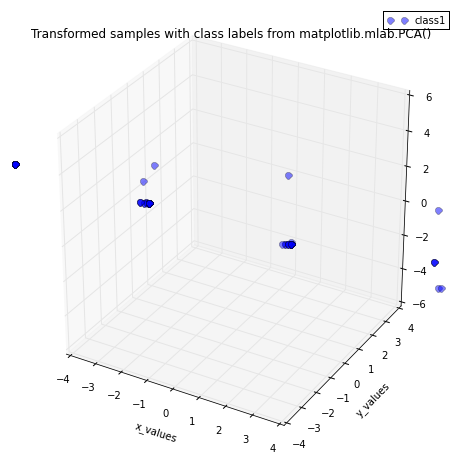

In [26]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(m.T)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

ax.plot(mlab_pca.Y[:,0],mlab_pca.Y[:,1],mlab_pca.Y[:,2],
         'o', markersize=7, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

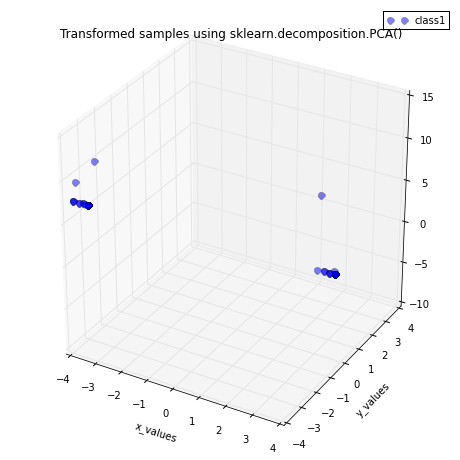

In [24]:
#yum install blas blas-devel lapack lapack-devel
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
sklearn_transf = sklearn_pca.fit_transform(m.T)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sklearn_transf[:,0],sklearn_transf[:,1], sklearn_transf[:,2],
         'o', markersize=7, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples using sklearn.decomposition.PCA()')
plt.show()